In [3]:
# import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/Diwali Sales Data.csv", encoding='latin-1')
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop(['Status','unnamed1'], axis = 1, inplace = True)

In [8]:
# check any column contain empty string or empty space
for col in df.columns:
  if df[col].dtype == "object":
    has_empty = df[col].str.strip().eq("").any()
    if has_empty:
      print(f"column {col} has empty string")

In [9]:
df.sample(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN
3213,1003242,Sneha,P00246142,F,51-55,51,0,Maharashtra,Western,Retail,Food,2,11999.0
3212,1002174,DeMoss,P00075542,F,51-55,51,1,Uttar Pradesh,Central,Automobile,Food,4,12001.0


In [10]:
df.isnull().sum().sum()

np.int64(12)

In [11]:
# change Martial_Status column
def change_stat(value):
  if value == 1:
    return "Married"
  else:
    return "Not Married"

df["Marital_Status"] = df["Marital_Status"].apply(change_stat)

In [12]:
#drop null values
# df.dropna(inplace = True)
x = df['Amount'].mean()
df['Amount'] = df['Amount'].fillna(x)

In [13]:
#change data type
df['Amount']= df['Amount'].astype(int)

In [14]:
df['Amount'].dtypes

dtype('int64')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
df[['Amount','Age','Orders']].describe()

,Amount,Age,Orders
count,11251.000000,11251.000000,11251.000000
mean,9453.609901,35.421207,2.489290
std,5219.569169,12.754122,1.115047
min,188.000000,12.000000,1.000000
25%,5443.500000,27.000000,1.500000
50%,8110.000000,33.000000,2.000000
75%,12671.000000,43.000000,3.000000
max,23952.000000,92.000000,4.000000


**EXPLORATORY DATA ANALYSIS**

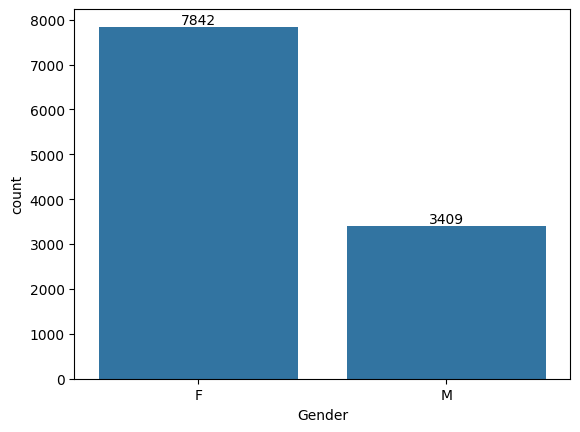

In [17]:
# univariate analysis, to see total number of male/female candidate
ax = sns.countplot(x = df['Gender'])
ax.bar_label(ax.containers[0])
plt.show()

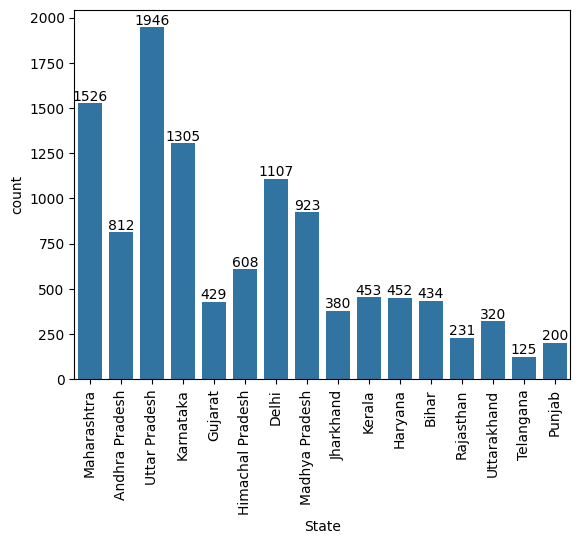

In [18]:
# univariate analysis: count state wise customer.
ax =sns.countplot(x = df['State'])
ax.bar_label(ax.containers[0])
sns.set_style(style = 'darkgrid')
plt.xticks(rotation = 90)
plt.show()

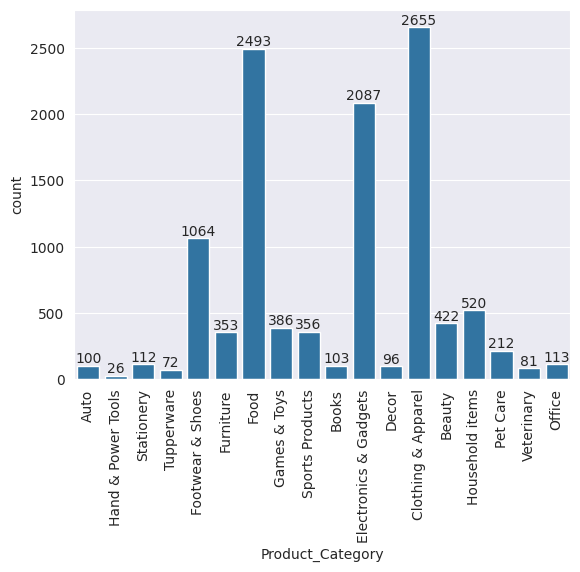

In [19]:
# univariate analysis of prodct category.
ax = sns.countplot(x =df['Product_Category'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.show()

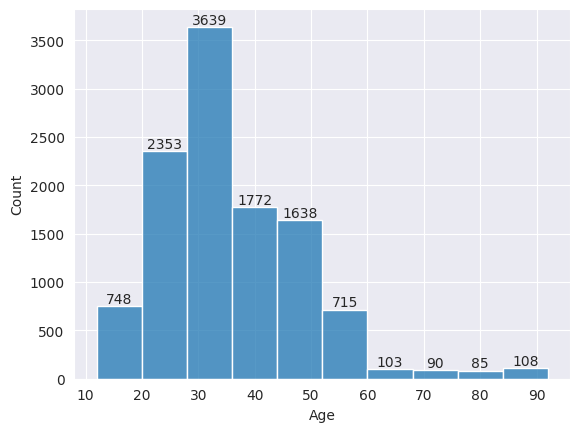

In [20]:
# univariate analysis of age
ax = sns.histplot(x = df['Age'], bins = 10)
ax.bar_label(ax.containers[0])
plt.show()

In [21]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = ["Amount"], inplace= False)

,Gender,Amount
1,M,31932182
0,F,74430383


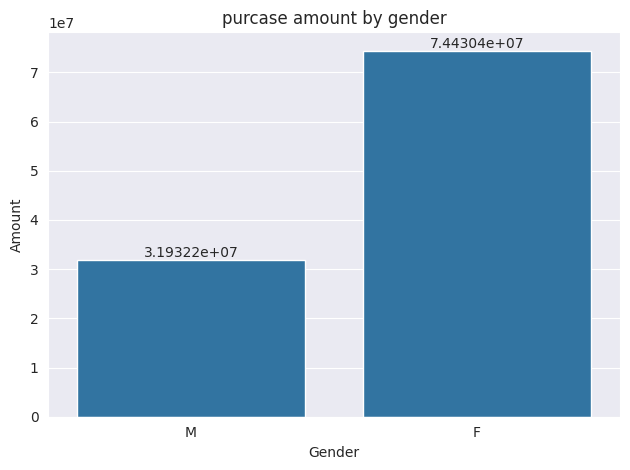

In [22]:
# bivariate analysis, to see total amount by gender.
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = ['Amount'], inplace = False)
ax = sns.barplot(x= 'Gender', y = 'Amount', data = sales_gen)
ax.bar_label(ax.containers[0])
plt.title("purcase amount by gender")
plt.tight_layout()
plt.show()

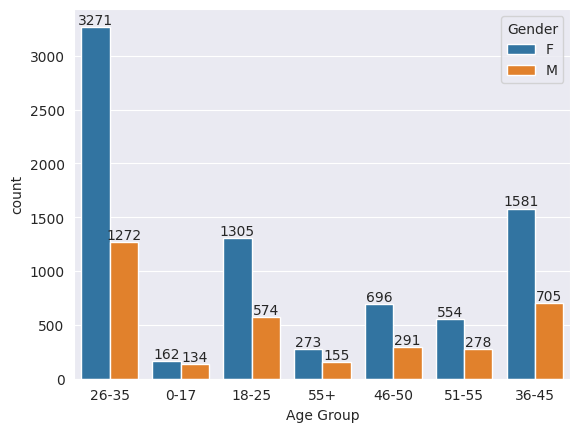

In [23]:
# count number of male/female candidate of different age group
ax =sns.countplot(x = df['Age Group'], hue = df['Gender'])
for container in ax.containers:
  ax.bar_label(container)
plt.show()

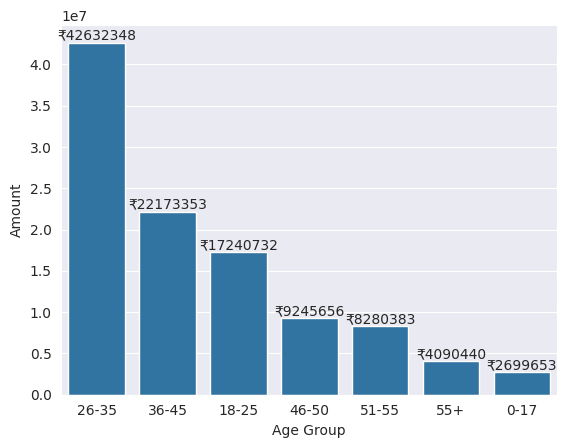

In [24]:
# bivariate analysis: Total purchase amount by age group
sample_age= df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
ax = sns.barplot(x = 'Age Group', y = 'Amount', data = sample_age)
ax.bar_label(ax.containers[0],fmt='₹%.0f')
plt.show()

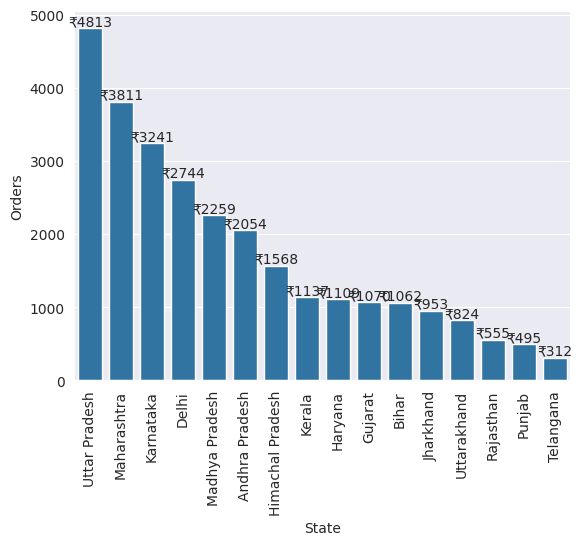

In [25]:
# bivariate analysis: State wise number of order.
sample_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = ['Orders'], ascending = False)
ax = sns.barplot(x = 'State', y = 'Orders', data = sample_state)
ax.bar_label(ax.containers[0], fmt='₹%.0f')
plt.xticks(rotation = 90)
plt.show()

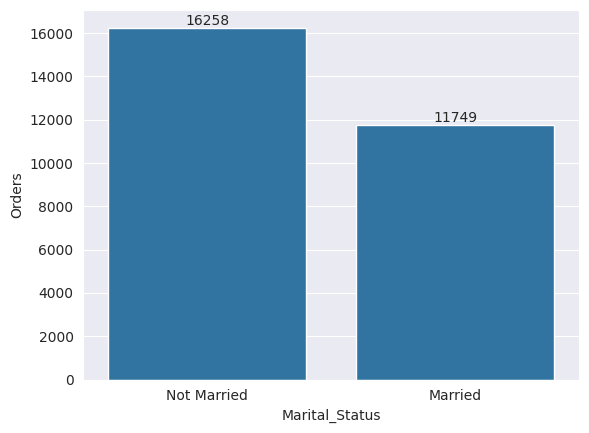

In [26]:
77# bivariate analysis: number of order by mariatl status
sample_state = df.groupby(['Marital_Status'], as_index = False)['Orders'].sum().sort_values(by = ['Orders'], ascending = False)
ax = sns.barplot(x = 'Marital_Status', y = 'Orders', data = sample_state)
ax.bar_label(ax.containers[0])
plt.show()

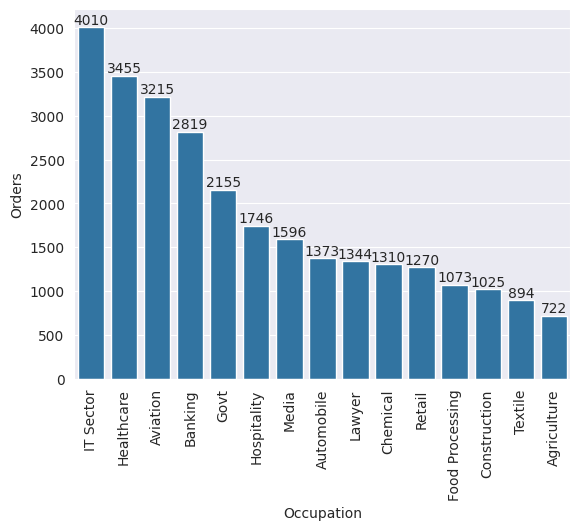

In [27]:
# bivariate analysis: number of orders by occupation
sample = df.groupby(['Occupation'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)
ax = sns.barplot(x = 'Occupation', y = 'Orders', data = sample)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.show()

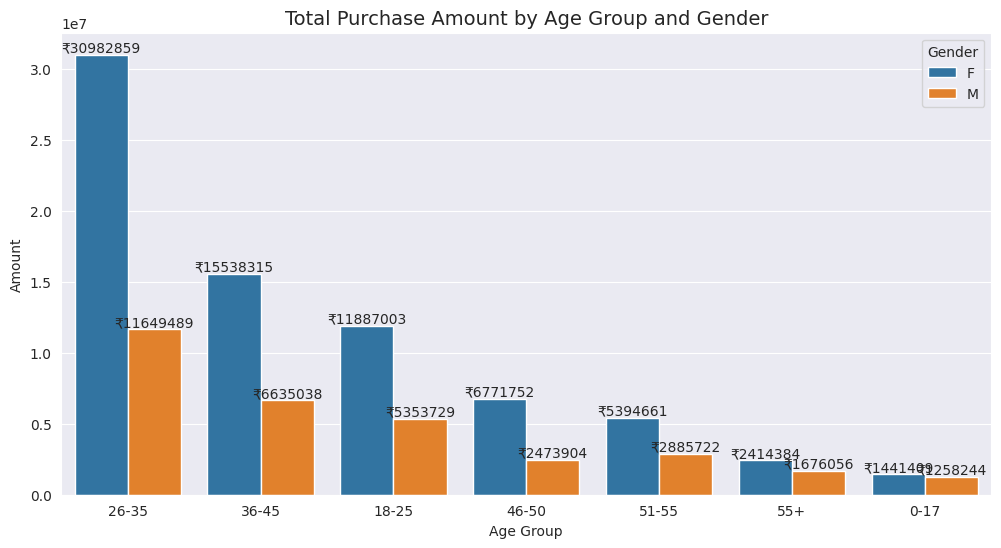

In [28]:
# multivariate analysis: total amount by gender and age group.
sample =df.groupby(["Age Group", "Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)
plt.figure(figsize = (12,6))
ax = sns.barplot(x = "Age Group", y = "Amount", hue = "Gender", data = sample)
for i in ax.containers:
  ax.bar_label(i,fmt='₹%.0f')

plt.title("Total Purchase Amount by Age Group and Gender", fontsize=14)
plt.show()

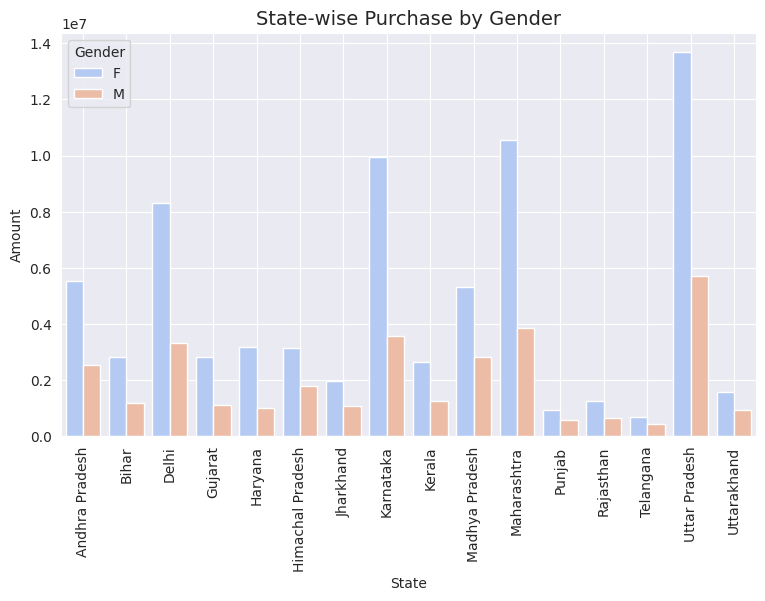

In [29]:
# multivariate analysis: State wise spending by gender.
df_city_gender = df.groupby(['State', 'Gender'], as_index=False)['Amount'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x='State', y='Amount', hue='Gender', data=df_city_gender, palette='coolwarm')
plt.title("State-wise Purchase by Gender", fontsize=14)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()


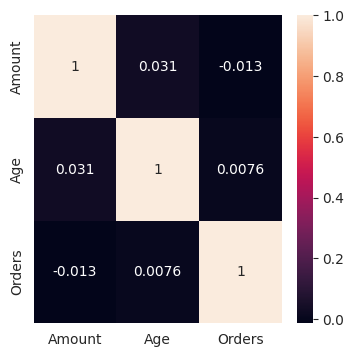

In [30]:
# Heatmap: Correlation between Amount, Age, Orders.
corr = df[['Amount', 'Age', 'Orders']].corr()
plt.figure(figsize = (4,4))
sns.heatmap(corr, annot = True)
plt.show()

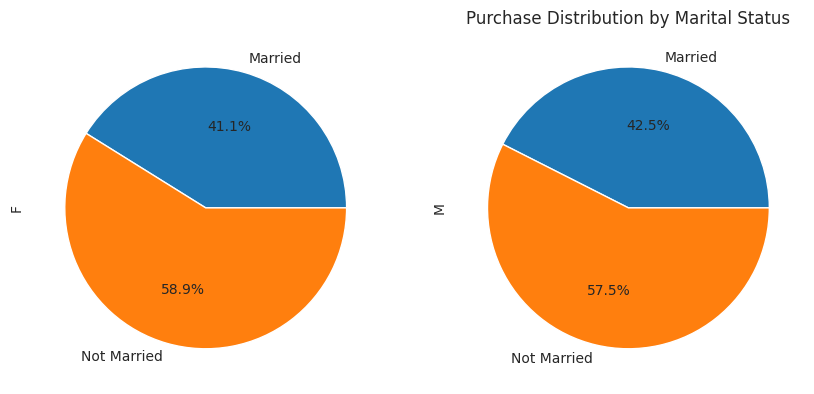

In [31]:
# Pie Chart: Purchase Distribution by Marital Status and Gender.
df_marital = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().unstack()
df_marital.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(10, 5), legend=False)
plt.title("Purchase Distribution by Marital Status")
plt.show()

